<a href="https://colab.research.google.com/github/Nacionalista-Peru/WQI/blob/main/Paper_about_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [ ]:
import missingno as msno

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix

In [ ]:
from sklearn import tree

In [ ]:
df = pd.read_csv("/content/water_dataX.csv", encoding='utf-8')

In [ ]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [ ]:
df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [ ]:
# Remove non-numeric characters from `Temp` column
df['Temp'] = df['Temp'].astype(str).str.replace(r'[^\d.]', '', regex=True)
# Convert `Temp` column to numeric type
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STATION CODE                      1991 non-null   object 
 1   LOCATIONS                         1991 non-null   object 
 2   STATE                             1991 non-null   object 
 3   Temp                              1899 non-null   float64
 4   D.O. (mg/l)                       1991 non-null   object 
 5   PH                                1991 non-null   object 
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object 
 7   B.O.D. (mg/l)                     1991 non-null   object 
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object 
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object 
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object 
 11  year                              1991 non-null   int64  
dtypes: flo

In [ ]:
# Get all object column names excluding the ones you want to keep as object
object_columns = df.select_dtypes(include='object').columns.difference(['STATION CODE', 'LOCATIONS', 'STATE'])

# Remove any leading/trailing whitespaces from the columns to be converted
for col in object_columns:
    df[col] = df[col].astype(str).str.strip()

# Convert all object columns to numeric (filling errors with NaN)
for col in object_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print updated info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STATION CODE                      1991 non-null   object 
 1   LOCATIONS                         1991 non-null   object 
 2   STATE                             1991 non-null   object 
 3   Temp                              1899 non-null   float64
 4   D.O. (mg/l)                       1960 non-null   float64
 5   PH                                1983 non-null   float64
 6   CONDUCTIVITY (µmhos/cm)           1966 non-null   float64
 7   B.O.D. (mg/l)                     1948 non-null   float64
 8   NITRATENAN N+ NITRITENANN (mg/l)  1766 non-null   float64
 9   FECAL COLIFORM (MPN/100ml)        1675 non-null   float64
 10  TOTAL COLIFORM (MPN/100ml)Mean    1859 non-null   float64
 11  year                              1991 non-null   int64  
dtypes: flo

In [ ]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


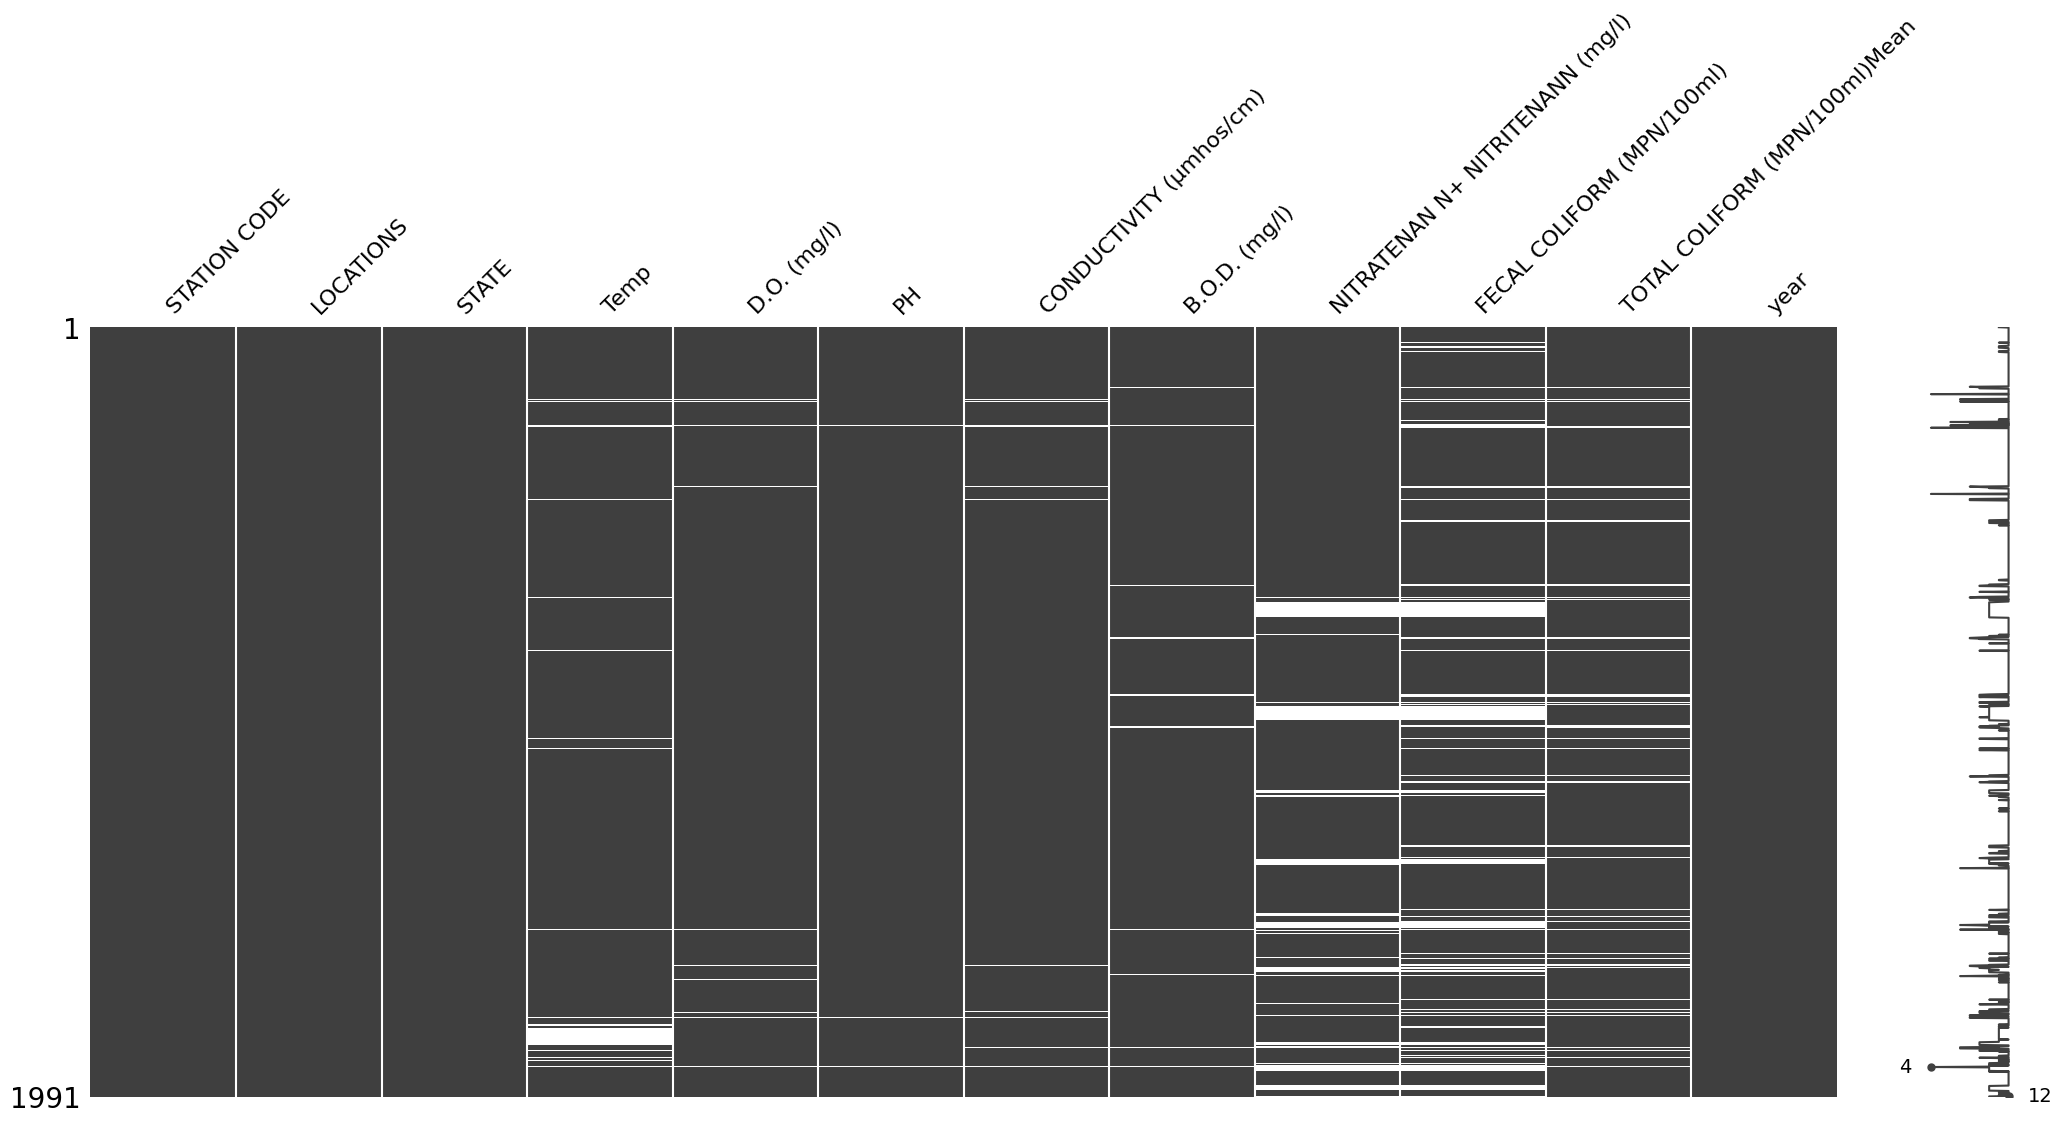

In [ ]:
#Preprocessing: Missing Value Problem
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [ ]:
# handle missing value with average of features
# Handle missing values with the mean of each feature
df["Temp"].fillna(value=df["Temp"].mean(), inplace=True)

# Note the correct column name with space here
df["D.O. (mg/l)"].fillna(value=df["D.O. (mg/l)"].mean(), inplace=True)

df["PH"].fillna(value=df["PH"].mean(), inplace=True)

# Note the correct column name with space and special character here
df["CONDUCTIVITY (µmhos/cm)"].fillna(value=df["CONDUCTIVITY (µmhos/cm)"].mean(), inplace=True)

df["B.O.D. (mg/l)"].fillna(value=df["B.O.D. (mg/l)"].mean(), inplace=True)

# Assuming the column name in the original data is "NITRATENAN N+ NITRITENANN (mg/l)"
df["NITRATENAN N+ NITRITENANN (mg/l)"].fillna(value=df["NITRATENAN N+ NITRITENANN (mg/l)"].mean(), inplace=True)

df["FECAL COLIFORM (MPN/100ml)"].fillna(value=df["FECAL COLIFORM (MPN/100ml)"].mean(), inplace=True)
df["TOTAL COLIFORM (MPN/100ml)Mean"].fillna(value=df["TOTAL COLIFORM (MPN/100ml)Mean"].mean(), inplace=True)




In [ ]:
df.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [1]:
import pandas as pd
import os
import io

In [2]:
# Specify the absolute path to your CSV file (modify as needed)
df = pd.read_csv("/content/water_dataX.csv", encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '/content/water_dataX.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')